In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import norm

In [2]:
LYMPH_AREA = [88.57, 84.96, 58.20, 60.84, 66.21, 64.55, 90.62, 65.14, 97.27, 52.83, 97.85, 122.56, 61.72, 63.96, 96.00, 83.50, 79.59, 65.43, 172.66, 56.15, 71.97, 83.69, 138.38, 113.87, 67.29, 97.07, 68.07, 97.17, 68.26, 46.87, 125.59, 88.96, 58.89, 143.85, 69.24, 94.24, 117.97, 78.03, 56.25, 87.30, 81.74, 88.67, 60.35, 132.23, 54.20, 80.86, 74.32, 86.91, 65.43, 88.38]
LYMPH_NPOLAR = [0.04430, 0.06694, 0.02357, 0.02025, 0.28590, 0.06605, 0.06168, 0.12731, 0.14691, 0.04050, 0.11609, 0.09951, 0.12401, 0.13511, 0.14220, 0.13795, 0.12573, 0.12839, 0.11360, 0.16065, 0.05355, 0.10924, 0.26627, 0.27559, 0.06046, 0.11169, 0.10379, 0.15838, 0.05226, 0.28644, 0.21480, 0.01329, 0.09822, 0.26709, 0.08579, 0.26515, 0.21619, 0.06251, 0.08225, 0.19916, 0.18759, 0.07373, 0.03184, 0.03571, 0.12607, 0.11498, 0.19376, 0.11575, 0.13287, 0.14543]
m0_LYMPH_AREA = 83.2
m0_LYMPH_NPOLAR = 0.139
sigma_sqrt0_LYMPH_AREA = 908.1
sigma_sqrt0_LYMPH_NPOLAR = 0.007577
r0 = 0.263

SEGM_AREA = []
SEGM_NPOLAR = []

In [3]:
LYMPH = pd.DataFrame({'AREA': LYMPH_AREA[:], 'NPOLAR': LYMPH_NPOLAR[:]})

In [4]:
LYMPH.head(5)

,AREA,NPOLAR
0,88.57,0.04430
1,84.96,0.06694
2,58.20,0.02357
3,60.84,0.02025
4,66.21,0.28590


1.2.1. Работаем с исходной выборкой объёма n.
1.2.2. Среди всех выборочных значений найдите минимальное значение − x_min 
1.2.3. Среди всех выборочных значений найдите максимальное значение - x_max

In [5]:
x_max = LYMPH.NPOLAR.max(axis=0)
x_max

0.28644

In [6]:
x_min = LYMPH.NPOLAR.min(axis=0)
x_min

0.01329

1.2.4. Вычислите размах

In [7]:
R = x_max - x_min
R

0.27314999999999995

1.2.5. Определите число интервалов

In [8]:
s = 1 + (3.3 * math.log10(LYMPH.NPOLAR.size))
s

6.606601014308861

1.2.6. Определите длину интервала (шаг разбиения)   Значение
h округлите до числа десятичных знаков после запятой, содержащихся в выборочных значениях x_k изучаемого признака (см. 1.1.2) так, чтобы на конце была четная цифра.

In [9]:
h = round(R/s, 5)
h

0.04135

1.2.7. За начало первого интервала gamma0 рекомендуется выбирать gamma0 = x_min − h⁄2. Хотя может так оказаться, в зависимости от данных, что эта величина окажется отрицательной. Тогда в качестве её значения можно взять величину gamma0 = gamma0/2.

In [10]:
gamma0 = x_min/2
gamma0

0.006645

1.2.8. Нахождение границ интервалов.
1.2.8.1. От точки gamma0 с шагом h получаем границы интервалов gammak, пока не будут покрыты x_min и x_max.
1.2.8.2. Полученные значения gammak – границ интервалов внесите в таблицу No 1 (статистическая таблица).
1.2.8.3. Рассчитайте середины интервалов

In [11]:
gammak = [0.006645]
gamma_t = gamma0
while(gamma_t + h < x_max):
    gammak.append(round(gamma_t + h, 5))
    gamma_t += h
gammak.append(round(gamma_t + h, 5))
gammak

[0.006645, 0.04799, 0.08934, 0.1307, 0.17205, 0.2134, 0.25474, 0.29609]

In [12]:
xk = [round(gamma0 + h/2, 5)]
for i in range(1, len(gammak)-1):
    xk.append(round(xk[i - 1] + h, 5))
xk

[0.02732, 0.06867, 0.11002, 0.15137, 0.19272, 0.23407, 0.27542]

| Nk | Границы интервалов, gamma_k-1 + e, gammak | Кодировка | Частота mk | Накопленная частота Mk | Середина интервала xk |
|---|---|---|---|---|---|
| 1 | [0.00664, 0.04799] |  | 7 | 7 | 0.02732 |
| 2 | [0.04800, 0.08934] |  | 10 | 17 | 0.06867 |
| 3 | [0.08935, 0.13070] |  | 14 | 31 | 0.11002 |
| 4 | [0.13071, 0.17205] |  | 8 | 39 | 0.15137 |
| 5 | [0.17206, 0.21340] |  | 3 | 42 | 0.19272 |
| 6 | [0.21341, 0.25474] |  | 2 | 44 | 0.23407 |
| 7 | [0.25475, 0.29609] |  | 6 | 50 | 0.27542 |


In [13]:
k = 0
for element in LYMPH.NPOLAR:
    if (element >= 0.25475) and (element <= 0.29609):
        k += 1
k

6

In [37]:
std = LYMPH.NPOLAR.std()
std

0.07434144110323744

In [36]:
mean = LYMPH.NPOLAR.mean()
mean

0.12613

Гистограмма

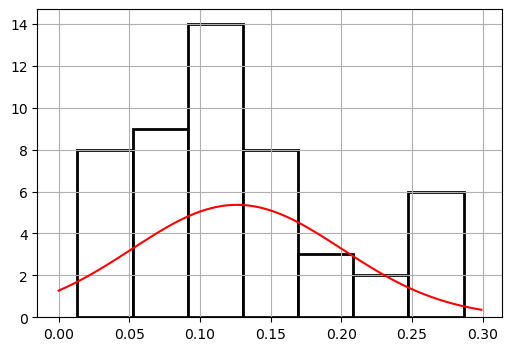

In [16]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
x = np.arange (0, 0.3, 0.001)

ax.hist(LYMPH.NPOLAR, 7, color='w', linewidth=2, edgecolor='k')
plt.plot (x, norm.pdf(x, mean, std), color='r')
ax.grid()
plt.show()

Полигон

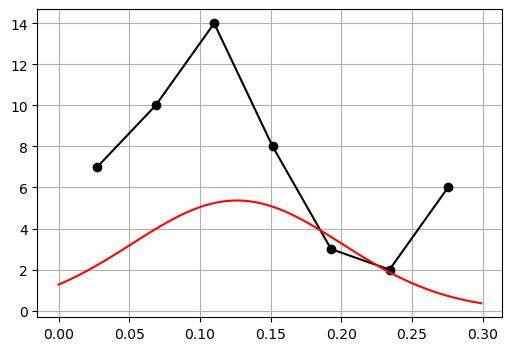

In [17]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
#x = np.arange (0, 0.3, 0.001)

m0 = [7, 10, 14, 8, 3, 2, 6]

plt.plot(xk, m0, 'o-', color='k')
plt.plot (x, norm.pdf(x, mean, std), color='r')
ax.grid()
plt.show()

Кумулята

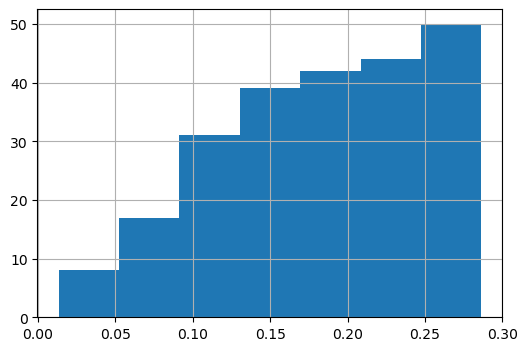

In [18]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
#x = np.arange (0, 0.3, 0.001)

mk = [7, 17, 31, 39, 42, 44, 50]

plt.hist(LYMPH.NPOLAR, bins=7, cumulative=True)
ax.grid()
plt.show()

1.3.1 Нахождение медианы (Me).

In [19]:
gamma_k_1 = 0.08935
M_k_1 = 17
m_k = 14
Me = gamma_k_1 + (h*((25-M_k_1)/m_k))
Me

0.11297857142857143

1.3.3. Нахождение моды (Mo).

In [20]:
gamma_k_1 = 0.08934
m = [7, 10, 14, 8, 3, 2, 6]
k = 2
Mo = gamma_k_1 + (h*((m[k] - m[k-1])/(2*m[k] - m[k-1] - m[k+1])))
Mo

0.10588

1.4. Метод произведений для вычисления характеристик вариационного ряда.

In [21]:
xk = [0.02732, 0.06867, 0.11002, 0.15137, 0.19272, 0.23407, 0.27542]
mk = [7, 10, 14, 8, 3, 2, 6]
sum(mk)

50

| xk | mk | yk | mkyk | mkyk^2 | mkyk^3 | mkyk^4|
|---|---|---|---|---|---|---|
| 0.02732 | 7 | -2 | -14 | 28 | -56 | 112 |
| 0.06867 | 10 | -1 | -17 | 10 | -10 | 10 |
| 0.11002 | 14 | 0 | 0 | 0 | 0 | 0 |
| 0.15137 | 8 | 1 | 39 | 8 | 8 | 8 |
| 0.19272 | 3 | 2 | 84 | 12 | 24 | 48 |
| 0.23407 | 2 | 3 | 132 | 18 | 54 | 162 |
| 0.27542 | 6 | 4 | 200 | 96 | 384 | 1536 |
|  | 50 | 7 | 20 | 172 | 404 | 1876 |

In [22]:
a = 0.11002
yk = []
for el in xk:
    yk.append(round((el - a)/h, 1))
sum(yk)

7.0

pow 1

In [23]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * yk[i])
sum1 = sum(mkyk)

pow 2

In [24]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 2))
sum2 = sum(mkyk)

pow 3

In [25]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 3))
sum3 = sum(mkyk)

pow 4

In [26]:
mkyk = []
for i in range(0, 7):
    mkyk.append(mk[i] * pow(yk[i], 4))
sum4 = sum(mkyk)

1.4.6. Рассчитайте начальные моменты для масштабированной переменной y:

In [27]:
a1y = (1/50)*sum1
a2y = (1/50)*sum2
a3y = (1/50)*sum3
a4y = (1/50)*sum4
a1y, a2y, a3y, a4y

(0.4, 3.44, 8.08, 37.52)

In [28]:
nu2y = sigma_sq = a2y - pow(a1y, 2)
nu2y

3.28

In [29]:
sigma = math.sqrt(sigma_sq)
round(sigma, 5)

1.81108

In [30]:
nu3y = a3y - 3*a2y*a1y + 2*pow(a1y, 3)
nu3y

4.08

In [31]:
nu4y = a4y - 4*a3y*a1y + 6*a2y*pow(a1y, 2) + 3*pow(a1y, 4)
round(nu4y, 2)

27.97

In [32]:
x_mean = h*a1y + a
x_mean

0.12656

In [33]:
As = nu3y/pow(sigma, 3)
As

0.6868302231484359

In [34]:
sigma_sq_x = pow(h, 2)*nu2y
sigma_sq_x

0.005608217799999999

In [35]:
Ex = (nu4y/pow(sigma, 2)) - 3
Ex

5.527804878048782

| numb | n | h | x_mean | std | As | Ex | Mo | Me | nu2y | nu3y | nu4y |
|---|---|---|---|---|---|---|---|---|---|---|---|
| 1 | 50 | 0.04135 | 0.12613 | 0.074341 | 0.68683 | 0.10588 | 0.11298 | 3.28 | 4.08 | 27.97 |